In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [150]:
(dataset := pd.read_csv("fredsz.csv"))

,Distancia(cm),TempoExp1(s),TempoExp2(s),TempoExp3(s)
0,10,0.16800,0.12125,0.15900
1,20,0.18025,0.17700,0.18550
2,30,0.22500,0.23000,0.24800
3,40,0.27450,0.25650,0.29375
4,50,0.29225,0.29450,0.29650
5,60,0.30975,0.30975,0.31025
6,70,0.33650,0.34525,0.35350
7,80,0.37200,0.38000,0.39000
8,90,0.42400,0.43425,0.42500
9,100,0.50000,0.47000,0.49575


In [153]:
std = []
for i in range(15):
    std.append(np.std([dataset.iloc[i,1], dataset.iloc[i,2], dataset.iloc[i,3]]))
dataset['std-erro'] = std

In [151]:
dist = list(dataset['Distancia(cm)']/100)
dist.reverse()
dataset['Distancia(cm)'] = dist
dataset

,Distancia(cm),TempoExp1(s),TempoExp2(s),TempoExp3(s)
0,1.5,0.16800,0.12125,0.15900
1,1.4,0.18025,0.17700,0.18550
2,1.3,0.22500,0.23000,0.24800
3,1.2,0.27450,0.25650,0.29375
4,1.1,0.29225,0.29450,0.29650
5,1.0,0.30975,0.30975,0.31025
6,0.9,0.33650,0.34525,0.35350
7,0.8,0.37200,0.38000,0.39000
8,0.7,0.42400,0.43425,0.42500
9,0.6,0.50000,0.47000,0.49575


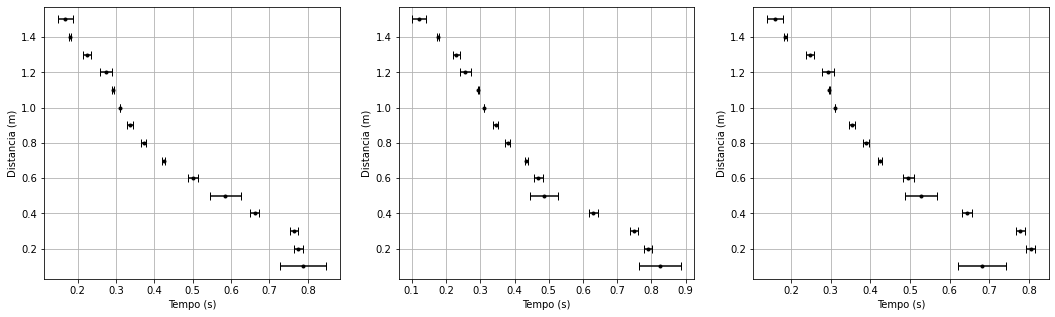

In [190]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
Y = dataset.iloc[0:,0].values

for i in range(3):
    X = dataset.iloc[0:, i+1].values

    ax[i].errorbar(X, Y, c='k', fmt=".", xerr=dataset.iloc[0:,4], capsize=4)
    ax[i].grid()
    ax[i].set_xlabel("Tempo (s)")
    ax[i].set_ylabel("Distancia (m)")

$$
S = S_0 + V_0t + \frac{at^2}{2} \\
S = \frac{at^2}{2}\\
$$
Portanto se fittarmos a linha $S$ em relação a $t^2$ acharemos $\frac{a}{2}$

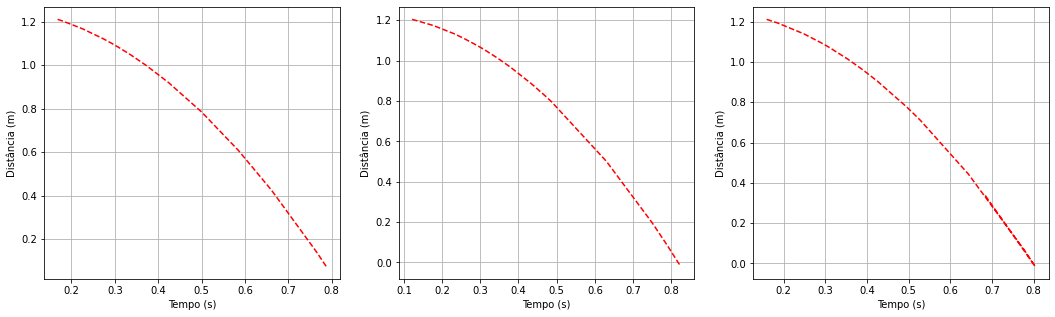

In [188]:
from sklearn.linear_model import LinearRegression

fig2, ax2 = plt.subplots(1, 3, figsize=(18, 5))
acs = []

Y = np.array(Y).reshape(-1,1)
for i in range(3):
    X = np.array(dataset.iloc[0:, i+1]).reshape(-1,1)
    X2 = X**2
    
    model = LinearRegression()
    model.fit(X2, Y)
    
    acs.append((model.coef_*2)[0][0])
    
    ax2[i].plot(X, model.predict(X2), '--',c="r")
    ax2[i].grid()
    ax2[i].set_xlabel("Tempo (s)")
    ax2[i].set_ylabel("Distância (m)")

In [169]:
acstd = np.std(acs)

In [171]:
ac = {
    "acs" : acs,
    "acstd" : acstd,
    "acmean" : np.mean(acs),
    "acmeanerr" : np.std(acs)/np.sqrt(len(acs))
}

In [172]:
ac

{'acs': [-3.8384740767702152, -3.6755968092105897, -3.9520957694171317],
 'acstd': 0.11347567939281042,
 'acmean': -3.8220555517993127,
 'acmeanerr': 0.06551521404391476}

with open("INFO.txt", 'w') as file:
    for item in ac.items():
        file.write(str(item[0]) + " " + str(item[1]) + "\n")

In [189]:
from matplotlib.backends import backend_pdf
with backend_pdf.PdfPages("graphs.pdf") as pdf:
    pdf.savefig(fig)
    pdf.savefig(fig2)